#  1 Business Understanding

### 1.1.1. Introduction
In 2021, the real estate industry in the United States was valued at USD 3.69 trillion and was expected to experience a 5.2% compound interest growth for the period between 2022 and 2030. This potential predicted growth of the industry, coupled with rising population rates in the US create a huge lucrative opportunity potential for real estate investors to make huge profits provided they <b>manage risk</b> and <b>make the right investments</b>.<br>
According to <a href= 'https://www.peoplescapitalgroup.com/average-roi-real-estate/'>People's Capital Group</a>, residential properties have an average annual return of 10.6% and commercial properties have a 9.5% average return.

### 1.1.2. Problem Statement
The stakeholder in this project is a real estate investment firm that is looking to construct residential homes in top five locations in the US that would provide a high return on their investment. This project therefore is a time series analysis on a Zillow dataset on various locations around the United States.<br><br>

The project will involve analyzing the house sale prices from 1996 to 2018 to determine the top five locations with the highest Return on Investment (ROI).<br>
The stakeholder is also risk-averse and therefore the project involves recommending locations with low price volatility which can easily be predicted with the model.<br>

### 1.1.3. Metric of Success

In our time series analysis, the metric of success to determine model viability will be MAPE-Mean Absolute Percentage Error.This metric was chosen as it gives the weighted error values i.e errors are divided by the true values.So incase of oultiers, they are handled well. RMSE only looks at the real minus the predicted, and outliers in data could give the wrong impression of how the model is performing

### 1.1.4. Project Scope
The primary goal of this project will be to conduct a time series analysis to predict the five best locations to invest in based on ROI.

### 1.1.5. Problem Questions
- What are the five best locations to invest in around the US?
- What makes these locations so lucrative?
- Does urbanization affect the prices of houses?
- Where are the locations of the houses with the highest price volatility?
- Can future median house prices be effectively predicted?


### 1.1.6. Project Objectives
1. Provide effective real estate investment recommendations to the stakeholder.
2. Increase the real estate investor’s customer base.


### 1.1.7.  Defining the Experimental Design

- Import the relevant libraries used in the analysis.

- Load dataset

- Read and explore the dataset we will use for our project.

- Data Cleaning & Preparation

- Exploratory Data Analysis (EDA)

- Data Pre-processing

- Modelling & Evaluation

- Challenging the model

- Conclusion

- Recommendations


The data used in this project was sampled from different states in USA. It contains historic median house prices from the period between April 1996 to April 2018 (22 Years).
The data was obtained from [zillow website](https://www.zillow.com/research/data/).

The dataset has 14723 rows and  272 columns.

Out of the 272 columns, there are 4 categorical columns and the rest are numerical.

Column names and description:
- RegionID - Unique region identifier
- RegionName - Names of the Regions (Zipcodes)
- City - City names for the regions
- State - Names of the states
- Metro - Names of metropolitan areas
- County Name - Names of counties
- Size Rank - Rank of Zipcodes by urbanization
- Date Columns (265 Columns) - Median house prices across the years 


# 3. Data Preparation

### 3.1. Importing Libraries

In [26]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# Modelling libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import pmdarima as pm #a library to help with auto_arima
import itertools

# Metrics Libraries
from sklearn.metrics import mean_absolute_percentage_error


### 3.2. Loading Data

In [27]:
# loading the dataset
df = pd.read_csv('./zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [28]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,1732

In [29]:
# getting the columns in the dataset
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

### 3.3. Data Cleaning

####  3.2.1 Validity
- Checking for validity of data.
- Renaming columns.

The RegionName contains zipcode data. It will be renamed to Zipcode.


In [30]:
# Rename RegionName to zipcode

df = df.rename(columns={'RegionName': 'Zipcode'})
df.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,173200.

### 2.2.2 Completeness 
- Handling the missing values in the dataframe. 

In [31]:
# Check for null values 

print(f'The data has {df.isna().sum().sum()} missing values')

The data has 157934 missing values


In [32]:
#defining a function to explore missing data
def missing_data(df):
 missing_data = df.isna().sum()
 missing_data = missing_data[missing_data>0]
 return missing_data.to_frame()

In [33]:
pd.set_option('display.max_columns',None)

In [34]:
missing_data(df).T

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1038,1038,1038,1038,1038,1038,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,918,918,918,918,918,918,887,887,887,887,887,887,866,866,866,866,866,866,814,814,801,801,801,801,723,723,723,723,723,723,667,667,667,667,667,667,640,640,640,640,640,640,620,620,620,620,620,620,613,613,613,613,613,613,607,607,607,607,607,607,598,598,598,598,598,598,587,587,587,587,587,587,580,580,580,580,580,580,579,579,349,349,349,349,308,308,308,308,308,308,275,275,275,275,275,275,251,251,251,251,251,251,224,224,224,224,224,224,206,206,206,206,206,206,151,151,151,151,151,151,109,109,109,109,109,109,56,56,56,56,56,56


- The missing values in the date columns will be filled through interpolation.
- The missing values in the metro column will be replaced with 'missing'

In [35]:
# imputing the missing values by replacing them with 'missing'

df.Metro.fillna('missing', inplace=True)

In [36]:
# interpolate missing values on date columns
df.interpolate(inplace=True)


In [37]:
# checking to see if missing values have been replaced

print(f'The data has {df.isna().sum().sum()} missing values')

The data has 0 missing values


### 2.2.3 Consistency
- Checking for duplicates

In [38]:
# checking for duplicates

print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


- The data has no duplicates hence it's consistent.

### 2.2.4 Uniformity
- Checking different columns to ensure that they are correct.

- Region ID is a unique identifier so it will not be explored further.
- The Zipcode column will be explored.

In [39]:
# exploring the datatype of zipcode column

df.dtypes['Zipcode']

dtype('int64')

Zipcodes represent locations and so should be categorical data types. The Zipcode column will be converted from integer to string type.

In [40]:
# Convert all the zipcodes to strings 

df.Zipcode = df.Zipcode.astype('string')
print(df.dtypes["Zipcode"])

string


In [41]:
# exploring the format of the zip codes

print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


Some zipcodes have four digits and others five. The column needs to be restructured to ensure all the digits are five in number. The columns with four digits seem to be missing a zero at the beginning.

In [45]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 

for i in range(len(df)):
    df.Zipcode[i] = df.Zipcode[i].rjust(5, '0')

In [46]:
print(df.Zipcode.min())

01001


All the zipcodes are now 5 digits long

To solve the problems raised under business understanding, two columns will be created.
- Return on Investment (ROI)

ROI is a measure of returns expected from investments.

- Coefficient of variation (CV)

CV is a measure of the dispersion of data points around the mean and represents the ratio of the standard deviation to the mean. It allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.


In [47]:
# calculating and creating a new column -ROI

df['ROI'] = (df['2018-04']/ df['1996-04'])-1



#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [48]:
df[["Zipcode", "ROI", "CV"]].head()

,Zipcode,ROI,CV
0,60657,2.083782,0.256487
1,75070,0.365295,0.152680
2,77494,0.567966,0.143950
3,60614,1.623971,0.237364
4,79936,0.571798,0.178326


### Convert the dataset into time series

A copy of the dataset will be created and converted into long view while preserving df as a wide view for EDA. Both the long and wide
will be relevant for EDA

In [49]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_df = df.copy()

In [50]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 
                                  'ROI', 'CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [51]:
new_df = melt_df(new_df)

In [52]:
# Converting the date data type into date time and indexing

new_df['Date'] = pd.to_datetime(new_df['Date'], format='%m/%y')


In [53]:

# Set the 'Date' column as index

new_df.set_index('Date', inplace=True)

In [54]:
# renaming the column value to median_price

new_df.rename(columns = {"value" : "median_houseprice"}, inplace=True)

In [55]:
# displaying the final cleaned data
new_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice
Date,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,77300.0


# 4. EDA

Exploration will be done on the data to determine:
1. Does Urbanization Affect Median House Prices?
2. Which cities fetch the highest median house prices?
3. What top 5 Zipcodes have the highest ROI?
4. Which zipcodes have high price volatility?
5. What is the trend of median houseprices over the years?hat is the trend of median houseprices over the years?


In [56]:
# Explore the data information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   RegionID           int64  
 1   Zipcode            string 
 2   City               object 
 3   State              object 
 4   Metro              object 
 5   CountyName         object 
 6   SizeRank           int64  
 7   ROI                float64
 8   CV                 float64
 9   median_houseprice  float64
dtypes: float64(3), int64(2), object(4), string(1)
memory usage: 327.4+ MB


The data has ten columns, five of which are numerical and five categorical. 

In [57]:
# exploring the statistics of the data columns 

explore_df = df[['RegionID', 'SizeRank', 'ROI', 'CV']]

explore_df.describe()

,RegionID,SizeRank,ROI,CV
count,14723.000000,14723.000000,14723.000000,14723.000000
mean,81075.010052,7362.000000,1.308045,0.237317
std,31934.118525,4250.308342,1.490612,0.095954
min,58196.000000,1.000000,-0.850937,0.041275
25%,67174.500000,3681.500000,0.739994,0.168237
50%,78007.000000,7362.000000,1.113095,0.228125
75%,90920.500000,11042.500000,1.602578,0.288000
max,753844.000000,14723.000000,101.962601,1.303920


### 4.1. Does Urbanization Affect Median House Prices?

In [60]:
# grouping median house prices by size rank

urban_housevalue = pd.DataFrame(new_df.groupby("SizeRank")["median_houseprice"].mean()
                                .sort_values(ascending=False).head(5))

Text(0.5, 0, 'SizeRank')

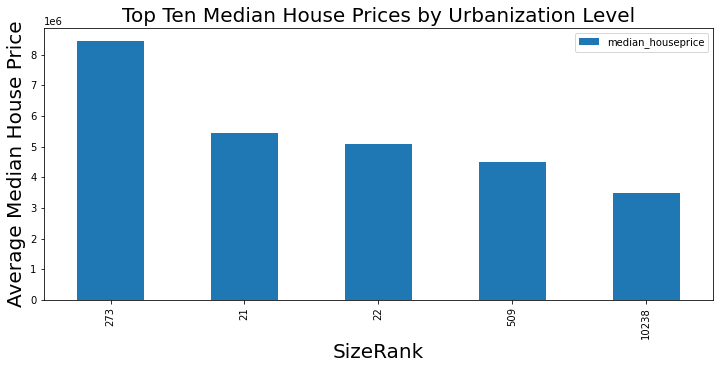

In [69]:
ax1 = urban_housevalue.plot(kind='bar', figsize=(12,5));
ax1.set_alpha(0.8)
ax1.set_title("Top Ten Median House Prices by Urbanization Level", fontsize=20)
ax1.set_ylabel("Average Median House Price", fontsize=20);
ax1.set_xlabel("SizeRank", fontsize=20)


### 4.2. Which cities fetch the highest median house prices?

In [66]:
# exploring top ten cities with highest house prices

houseprice_topcities = pd.DataFrame(new_df.groupby("City")["median_houseprice"].mean()
                                    .sort_values(ascending=False).head(5))

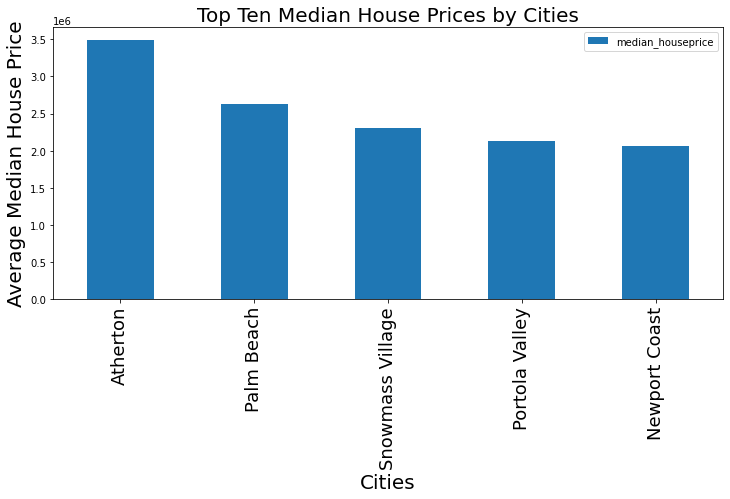

In [70]:
ax2 = houseprice_topcities.plot(kind='bar', figsize=(12,5));
ax2.set_alpha(0.8)
ax2.set_title("Top Ten Median House Prices by Cities", fontsize=20)
ax2.set_ylabel("Average Median House Price", fontsize=20);
ax2.set_xlabel("Cities", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

Size Rank represents urbanization from a rank 1 with 1 being the most urbanized area.
From the plot analysis, highly urban areas do fetch high median house prices since sizeRank 273 (New York, New York) shows the highest median house 
price. Rank 21 and 22 also represent New York. Four out of the top five ranks are from New York state.
So urbanization does not affect median house prices.

The top three cities with the highest median house prices are Atherton (California), Palm Beach(Florida) and Snowmass Village
(Colorado).

### 4.3. What top 5 Zipcodes have the highest ROI?

In [71]:

ROI_topzipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI"].mean().sort_values(ascending=False).head(5))

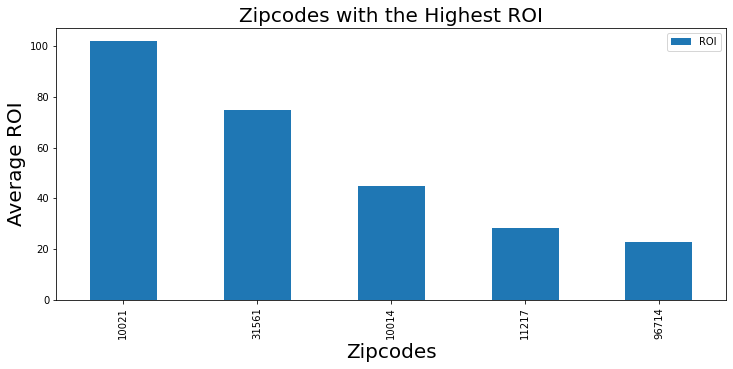

In [75]:
ax2 =ROI_topzipcodes.plot(kind='bar', figsize=(12,5));
ax2.set_alpha(0.8)

ax2.set_title("Zipcodes with the Highest ROI", fontsize=20)
ax2.set_ylabel("Average ROI", fontsize=20);
ax2.set_xlabel("Zipcodes", fontsize=20)
plt.show()


### 4.4. Which zipcodes have high price volatility?

In [77]:
CV_topzipcodes = pd.DataFrame(df.groupby("Zipcode")["CV"].mean().sort_values(ascending=False).head(5))

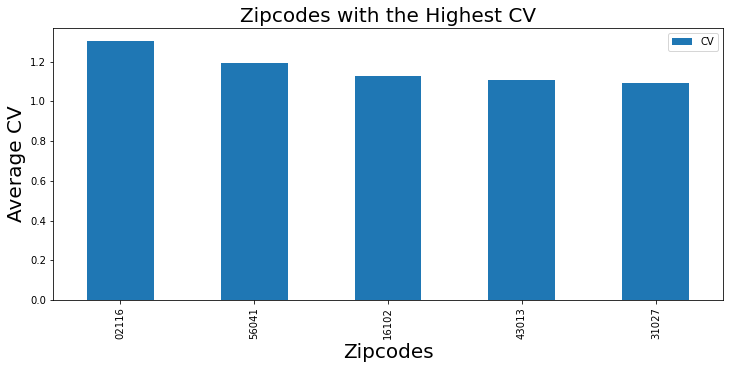

In [79]:
ax3 = CV_topzipcodes.plot(kind='bar', figsize=(12,5) );
ax3.set_alpha(0.8)
ax3.set_title("Zipcodes with the Highest CV", fontsize=20)
ax3.set_ylabel("Average CV", fontsize=20);
ax3.set_xlabel("Zipcodes", fontsize=20)
plt.show()

CV represents the coefficient of variation and how values deviate from the mean. Therefore, a high CV shows the price deviates further from the mean and means that there is presence of high price volatility. Areas with high price volatility may present the problem of being predicted effectively and hence can be an issue for investors looking to predict future median house sale prices.

The zipcodes with the highest price volatility are:
- 02116
   Boston- Massachusetts 
- 56041
   New Ulm- Minnesota  
- 16102
   New Castle-Pennsylavia 
- 43103
   Ohio-Colombus  
- 31027
   Dublin-Georgia 
   
 This means that real estate investors cannot invest in these areas.

The zipcodes with the highest ROI are Upper East Side- New York(10021), Sea Island- Georgia State (31561), - Manhattan -New York(10014), Brooklyn
New York(11217), and Hanalei- Hawaii (96714).

From the plot, New York state has the most zipcodes with the highest ROI.

### 4.5 What is the trend of median houseprices over the years?

In [82]:
resampled = new_df.resample('M').sum()

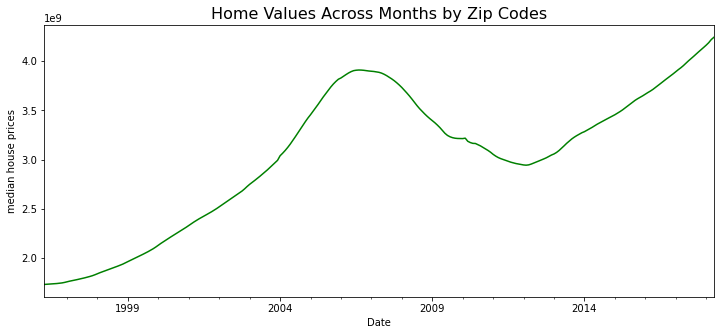

In [85]:
resampled.median_houseprice.plot(figsize=(12,5), color="green")
plt.title('Home Values Across Months by Zip Codes', fontsize=(16))
plt.ylabel('median house prices')
plt.show()

Aside from the increasing trend, there seems to be no particular seasonality for our plot across the months. However there seems
to have been a dip around the price of houses in 2008 which can be explained by the global recession that affected the housing
market in the US.

__What is the trend of the Median House prices over the years?__

In [86]:
# downsampling the data to explore the trend over the 22 years

annual_resampled = new_df.resample('A', level=0).mean()
annual_resampled.head()

,RegionID,SizeRank,ROI,CV,median_houseprice
Date,,,,,
1996-12-31,81075.010052,7362.0,1.308045,0.237317,118263.031387
1997-12-31,81075.010052,7362.0,1.308045,0.237317,121749.785200
1998-12-31,81075.010052,7362.0,1.308045,0.237317,128736.152335
1999-12-31,81075.010052,7362.0,1.308045,0.237317,138243.820326
2000-12-31,81075.010052,7362.0,1.308045,0.237317,151018.739387


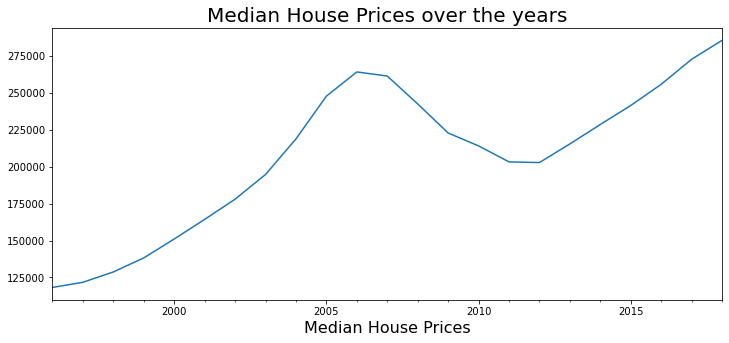

In [88]:
annual_resampled.median_houseprice.plot(figsize=(12, 5))
plt.title("Median House Prices over the years", fontsize = 20)
plt.xlabel("Years", fontsize = 16)
plt.xlabel("Median House Prices", fontsize = 16)
plt.show()

Since 1996, there has been an increase in the median house prices. However, these prices begun dropping from the year 2006 to 2008 due to global recession that negatively affected the real estate market in the US. The aftermath of the recession continued to cause a drop in the house prices to 2010 where prices became more stable before experiencing a hike in 2013. Since 2013, there has been a real estate boom.

# 5. MODELLING

In [89]:
new_df.Zipcode

Date
1996-04-01    60657
1996-04-01    75070
1996-04-01    77494
1996-04-01    60614
1996-04-01    79936
              ...  
2018-04-01    01338
2018-04-01    03293
2018-04-01    40404
2018-04-01    81225
2018-04-01    89155
Name: Zipcode, Length: 3901595, dtype: string

In [90]:
#top 5 zipcodes in terms of ROI
top_5 =['10021','31561','10014','11217','96714']

top5_df = new_df[new_df['Zipcode'].isin(top_5)]
top5_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice
Date,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173800.0
1996-04-01,61628,10014,New York,NY,New York,New York,509,44.968702,0.795409,194900.0
1996-04-01,62028,11217,New York,NY,New York,Kings,1535,28.154705,0.793134,125400.0
1996-04-01,98855,96714,Kilauea,HI,Kapaa,Kauai,12848,22.864834,0.703834,43650.0
1996-04-01,71578,31561,Sea Island,GA,Brunswick,Glynn,14623,74.953307,0.836530,32125.0


In [91]:
# We will be using one of those zipcodes for modelling
z_df = top5_df[top5_df['Zipcode'] =='10021']
z_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice
Date,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173800.0
1996-05-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0
1996-06-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0
1996-07-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0
1996-08-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173900.0


In [92]:
my_series =z_df['median_houseprice']
my_series[:10]

Date
1996-04-01    173800.0
1996-05-01    173850.0
1996-06-01    173850.0
1996-07-01    173850.0
1996-08-01    173900.0
1996-09-01    174100.0
1996-10-01    174450.0
1996-11-01    175050.0
1996-12-01    176000.0
1997-01-01    177250.0
Name: median_houseprice, dtype: float64

## 5.1 Seasonality

Basically, a time series consists of four components(level,trend,seasonality,residuals). Variation of those components causes the change in the pattern of the time series.If seasonality and trend are part of the time series then there will be effects in the forecast value

In [93]:
# checking for trend, seasonality and residuals in data
from statsmodels.tsa.seasonal import seasonal_decompose

In [94]:
def seasonal_decomposition(df):
    decomposition = seasonal_decompose(df)
    
    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plot gathered statistics
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    #plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

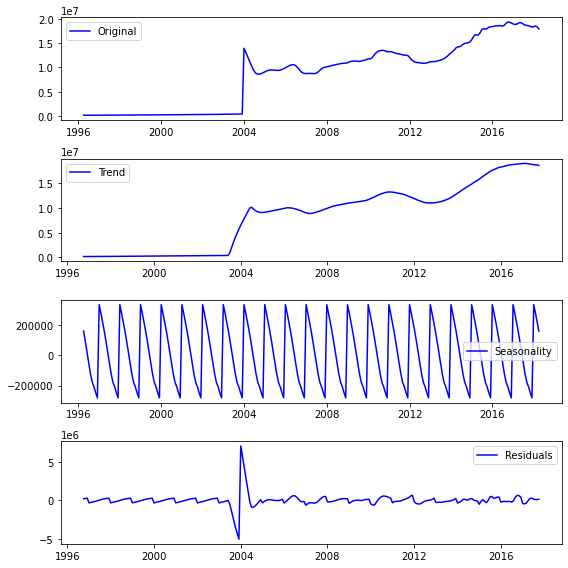

In [95]:
seasonal_decomposition(my_series)

* The straight line from 1996 to 2004 seems like data that was missing and was filled through interpolation.We will remove this data,since it might give the wrong perception during modelling

In [96]:
#remove data from 1996-2004
series_2 = my_series['2004':]
series_2.head()

Date
2004-01-01    13922800.0
2004-02-01    13140500.0
2004-03-01    12333800.0
2004-04-01    11490700.0
2004-05-01    10641200.0
Name: median_houseprice, dtype: float64

In [97]:
series_2.tail()

Date
2017-12-01    18307100.0
2018-01-01    18365900.0
2018-02-01    18530400.0
2018-03-01    18337700.0
2018-04-01    17894900.0
Name: median_houseprice, dtype: float64

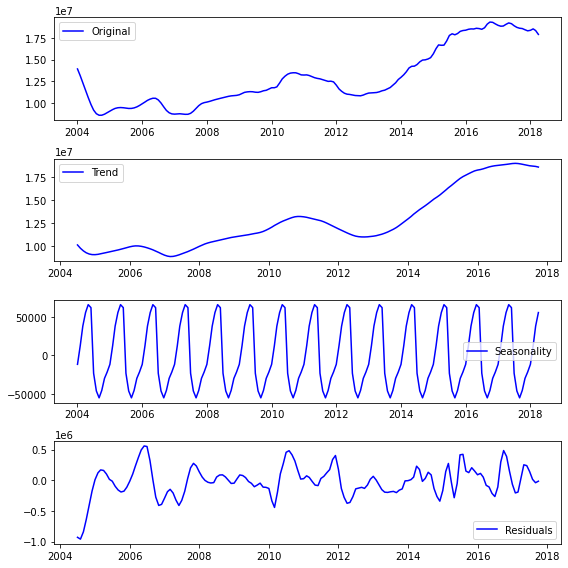

In [98]:
seasonal_decomposition(series_2)

* Now this gives a better view of our series components, with seasonality, trend and residual patterns clearly visible

## 5.2 Stationarity
We will use dickey fuller test to confirm that indeed the data is not stationary

In [99]:
def check_stationarity(df):
    result = adfuller(df)
  
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [100]:
check_stationarity(series_2)

ADF Statistic: -1.488510
p-value: 0.539187
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


* **The p_value is greater than 0.05, and the test_statistic is also greater than the critical values,therefore we confirm that the time series is not stationary**

## 5.3  Detrending- through differencing
Now, we remove the trend

In [101]:
def detrend(df):
    '''function returns a stationary series'''
    
    diff_series = df.diff(1).diff(12).dropna()
    return diff_series

In [102]:
# we detrend our column using the function above 
detrended_series = detrend(series_2)

In [103]:
#check the stationarity of the detrended column
check_stationarity(detrended_series)

ADF Statistic: -3.064492
p-value: 0.029295
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


 **The p_value is less than 0.05 and also the test statistic is less than all of the critical values. The series has been made stationary**

## 5.4 Autocorrelation and partial correlation of the detrended series
The ACF can answer some questions like:<br>
-Is the observed time series white noise / random?- non zero correlations show relationship between the data points<br>
-Is an observation related to an adjacent observation or other points within it?<br>
-Can the observed time series be modeled with an MA model?<br>

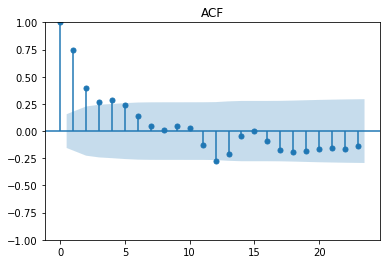

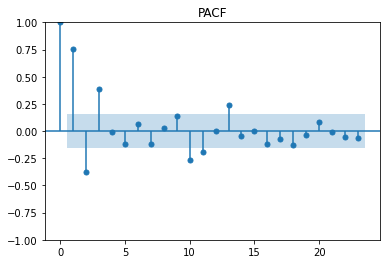

In [104]:
    
acf_plot = plot_acf(detrended_series, title="ACF")
pacf_plot = plot_pacf(detrended_series, title="PACF")

There is autocorrelation in the time series at several lags. Therefore, the time series is non-random.There is also significant partial correlations which further continues to support that the series is not random

## 5.5 Time Series Modelling
We saw that there is seasonality in the data, so the best model to use is one that also caters for seasonality-SARIMAX

In [ ]:
#using auto_arima- it does a random search for the best pdq,PDQS  
sarima_model = pm.auto_arima(series_2, 
                             m=12,
                             seasonal=True,
                             start_p=0,
                             start_q=0,
                             start_P=0,
                             start_Q=0,
                             max_order=6, 
                             test='adf',
                             error_action='warn',  
                             suppress_warnings=True,
                              stepwise=True,
                              trace=False)

In [105]:
#using auto_arima- it does a random search for the best pdq,PDQS  
sarima_model = pm.auto_arima(series_2, 
                             m=12,
                             seasonal=True,
                             start_p=0,
                             start_q=0,
                             start_P=0,
                             start_Q=0,
                             max_order=6, 
                             test='adf',
                             error_action='warn',  
                             suppress_warnings=True,
                              stepwise=True,
                              trace=False)

* When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points
 
* The Akaike Information Criterion (AIC) tests the goodness of fit.It rewards models that achieve a high goodness-of-fit with little complexity
* A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. 
* Auto_arima does a random search and comes up with the best parameters(from the given ones) that reduce the AIC.

In [106]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  172
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2362.843
Date:                Mon, 26 Sep 2022   AIC                           4727.686
Time:                        16:02:31   BIC                           4730.827
Sample:                    01-01-2004   HQIC                          4728.960
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.847e+10   4.11e+09     14.227      0.000    5.04e+10    6.65e+10
===================================================================================
Ljung-Box (L1) (Q):                 115.63   Jarque-Bera (JB):               107.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -1.12
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This model has a high AIC. Will look for other values of pdq and s that might lower it

In [107]:
# Define the p, d and q parameters to take any value between 0 and 2

p = d = q = range(0,2)


In [108]:

# Generate all different combinations of p, d , q and s
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [109]:
ans = []
for comb in pdq:    
    for combs in pdqs:
        try:
            model = sm.tsa.statespace.SARIMAX(series_2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = model.fit()
            ans.append([comb, combs, output.aic])
           
        except:
            continue

In [110]:
ans_df = pd.DataFrame(ans, columns=['pdq','pdqs', 'aic'])
ans_df

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",6096.685367
1,"(0, 0, 0)","(0, 0, 1, 12)",5578.689667
2,"(0, 0, 0)","(0, 1, 0, 12)",4998.793561
3,"(0, 0, 0)","(0, 1, 1, 12)",55339.517012
4,"(0, 0, 0)","(1, 0, 0, 12)",5018.846166
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",3895.182046
60,"(1, 1, 1)","(1, 0, 0, 12)",4100.041238
61,"(1, 1, 1)","(1, 0, 1, 12)",4070.740497
62,"(1, 1, 1)","(1, 1, 0, 12)",3923.894639


In [111]:
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic       3886.240262
Name: 63, dtype: object

There was an improvement in aic, so we use the order parameters pdq and pdqs shown above

In [112]:
my_model = sm.tsa.statespace.SARIMAX(series_2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [113]:

results = my_model.fit()

In [114]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  median_houseprice   No. Observations:                  172
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1938.120
Date:                            Mon, 26 Sep 2022   AIC                           3886.240
Time:                                    16:06:30   BIC                           3901.124
Sample:                                01-01-2004   HQIC                          3892.288
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7121      0.059     12.032      0.000       0.596       0.828
ma.L1          0.2567      0.024   

* The aic has improved. So lets check the distribution of residuals for this model

## 5.1 Model Diagnostics

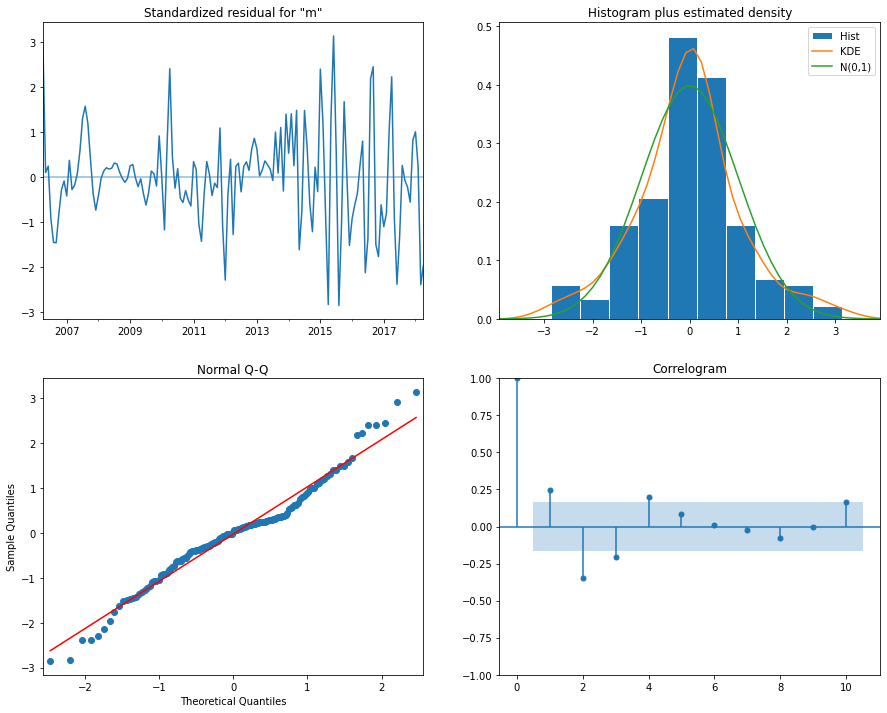

In [115]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

 There is still correlation in  the residuals(shown by Correlogram) thus the model can be improved 

In [116]:
my_model2 = sm.tsa.statespace.SARIMAX(series_2,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [117]:
results2 = my_model2.fit()

In [118]:
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  median_houseprice   No. Observations:                  172
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -1552.310
Date:                            Mon, 26 Sep 2022   AIC                           3130.621
Time:                                    16:09:37   BIC                           3166.750
Sample:                                01-01-2004   HQIC                          3145.292
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9196      0.225      4.094      0.000       0.479       1.360
ar.L2         -0.3105      0.228   

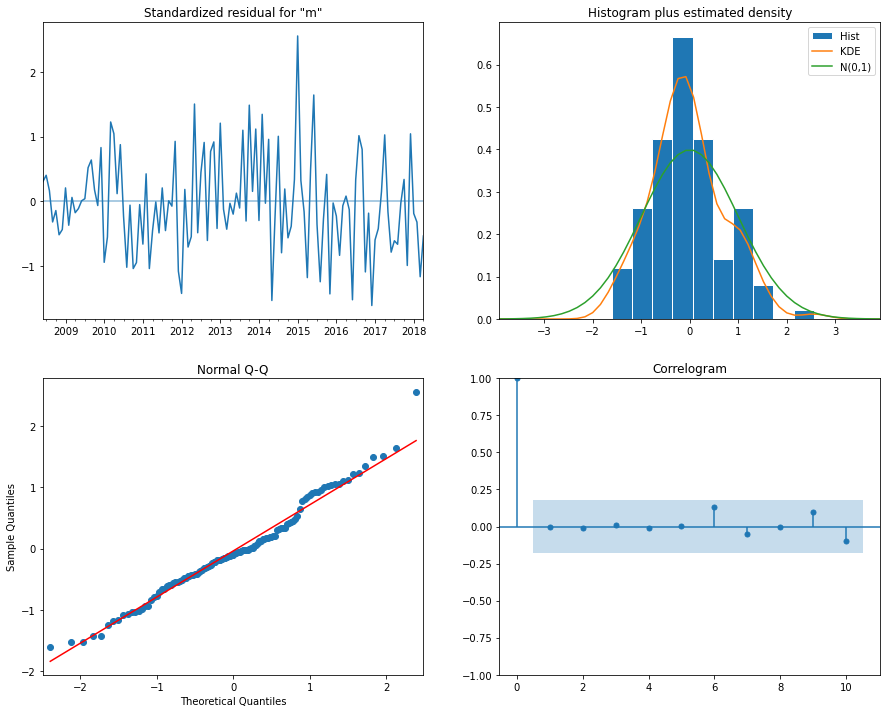

In [119]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

There is observed improvement in this new model. The AIC is lower, there is no correlation in the residuals and the Q-Q plot shows the residuals have been taken from a N(0,1). Also the histogram shows the distribution of the residuals with a mean of 0. So I will retain this model

## 5.7 Forecasting and Model Evaluation


We compare predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

### 5.7.1 Non dynamic forecast
uses in-sample prediction.The model sequentially predicts one-step-ahead using the true value from previous time step instead of using predicted value.

In [120]:
pred = results2.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

pred_ci = pred.conf_int() # this gives us the confidence interval for our forecasts

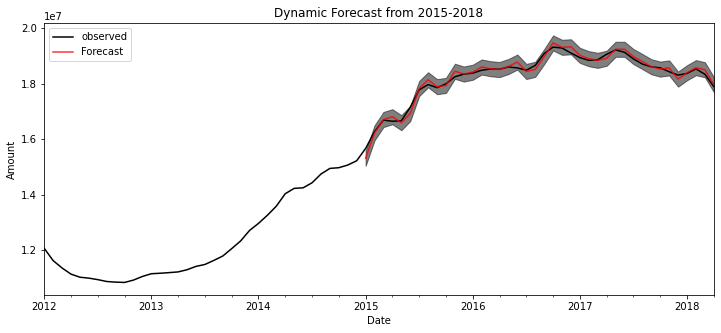

In [122]:
plt.figure(figsize = (12,5))
ax = series_2['2012':].plot(label='observed',color='black')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.5)

ax.set_title('Dynamic Forecast from 2015-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [123]:
# evaluation
y_forecasted1 = pred.predicted_mean
y_truth1 = series_2['2015-01-01':]
mean_absolute_percentage_error(y_truth1, y_forecasted1)

0.00520142029024966

#### 5.7.2 Dynamic Forecast
uses out-of-sample prediction.The model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast.

In [124]:
pred_dynamic = results2.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

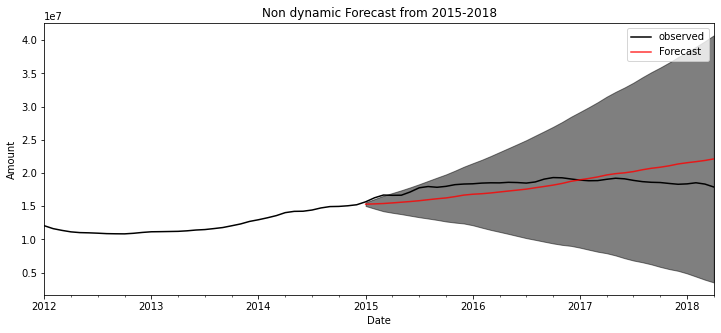

In [126]:
plt.figure(figsize = (12,5))
ax = series_2['2012':].plot(label='observed',color='black')
pred_dynamic.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.5)

ax.set_title('Non dynamic Forecast from 2015-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [127]:
# Evaluation
y_forecasted2 = pred_dynamic.predicted_mean
y_truth2 = series_2['2015-01-01':]
mean_absolute_percentage_error(y_truth2, y_forecasted2)

0.08421305761631803

In [128]:
pred_uc = results2.get_forecast(steps=36)#prediction 3 years into the future

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

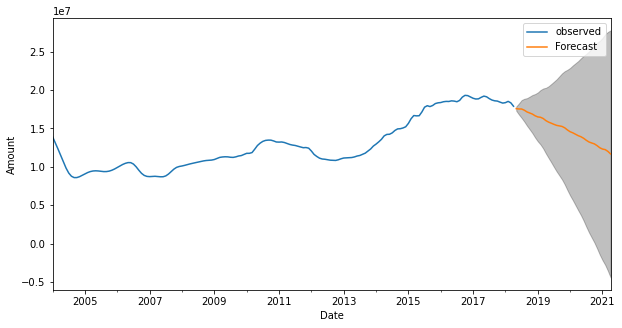

In [130]:
ax = series_2.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Amount')

plt.legend()
plt.show()

Our seasonal arima shows a drop in price in the coming years. Lets see the trend with an fbprophet model

In [133]:
from prophet import Prophet

In [145]:
series_p = z_df.copy()
series_p = series_p[series_p.Zipcode=='10021']
series_p

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice
Date,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173800.0
1996-05-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0
1996-06-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0
1996-07-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0
1996-08-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173900.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,18307100.0
2018-01-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,18365900.0
2018-02-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,18530400.0


In [146]:
series_p['Date'] = series_p.index
series_p

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice,Date
Date,,,,,,,,,,,
1996-04-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173800.0,1996-04-01
1996-05-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0,1996-05-01
1996-06-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0,1996-06-01
1996-07-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173850.0,1996-07-01
1996-08-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,173900.0,1996-08-01
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,18307100.0,2017-12-01
2018-01-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,18365900.0,2018-01-01
2018-02-01,61635,10021,New York,NY,New York,New York,273,101.962601,0.781809,18530400.0,2018-02-01


In [147]:
series_p = series_p[['Date','median_houseprice']]
series_p = series_p.reset_index(drop=True)

In [149]:
series_p.head()

,Date,median_houseprice
0,1996-04-01,173800.0
1,1996-05-01,173850.0
2,1996-06-01,173850.0
3,1996-07-01,173850.0
4,1996-08-01,173900.0


In [150]:
series_p = series_p[series_p.Date >='2004-01-01']
series_p.columns = ['ds','y']
series_p.head()


,ds,y
93,2004-01-01,13922800.0
94,2004-02-01,13140500.0
95,2004-03-01,12333800.0
96,2004-04-01,11490700.0
97,2004-05-01,10641200.0


In [139]:
m= Prophet()
m.fit(series_p)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [140]:
#making predictions
future_dates = m.make_future_dataframe(periods=36,freq='MS')
forecast = m.predict(future_dates)

forecasted_data=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data

,ds,yhat,yhat_lower,yhat_upper
0,2004-01-01,1.012229e+07,8.726191e+06,1.153940e+07
1,2004-02-01,1.009953e+07,8.652340e+06,1.145137e+07
2,2004-03-01,1.007139e+07,8.672170e+06,1.142073e+07
3,2004-04-01,9.789110e+06,8.325850e+06,1.137370e+07
4,2004-05-01,9.697795e+06,8.261641e+06,1.124549e+07
...,...,...,...,...
203,2020-12-01,2.417830e+07,2.267254e+07,2.559264e+07
204,2021-01-01,2.410020e+07,2.257237e+07,2.552262e+07
205,2021-02-01,2.419034e+07,2.268376e+07,2.560117e+07
206,2021-03-01,2.477052e+07,2.337251e+07,2.621852e+07


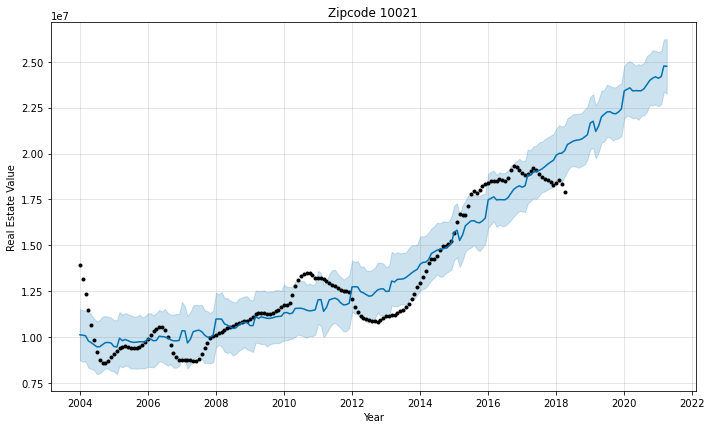

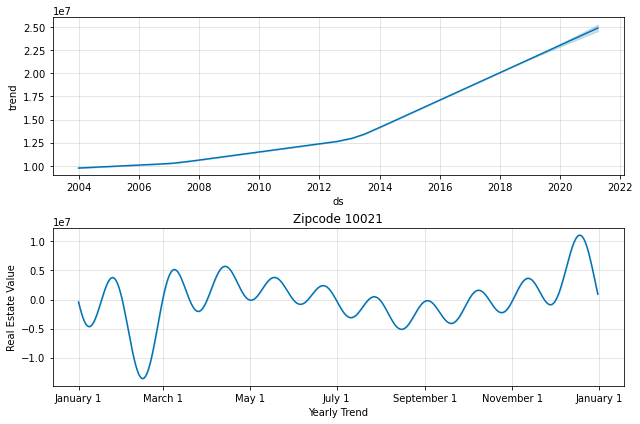

In [141]:
m.plot(forecast, uncertainty=True)
plt.title('Zipcode 10021')
plt.ylabel('Real Estate Value')
plt.xlabel('Year')
m.plot_components(forecast)
plt.title('Zipcode 10021')
plt.ylabel('Real Estate Value')
plt.xlabel('Yearly Trend');

In [142]:
# Evaluating the prophet model
y_true = series_2['2015-01-01':]
pred1 = forecasted_data[forecasted_data['ds']>='2015-01-01']
y_pred = pred1[pred1['ds']<='2018-04-01']['yhat']
mape = mean_absolute_percentage_error(y_true, y_pred)
mape

0.05600225726480916

# Conclusion

* There is a difference in the forecast between our model and the prophet model
* The prophet model has a higher MAPE than our dynamic model. So we would confidently go with our model.
* In future analysis, we would need to do analysis of the different zipcodes to be able to answer the investors question, as with this specific zipcode used, we would highly discourage the investor to invest there at the moment
* We would need to split our data into train and test set and redo the analysis with this data

# Recommendations

- The company should focus on locations with great beaches and outdoor activities since houses in these locations fetch highest prices as this is seen from cities in California and Florida.

- Investors should consider investing in New York since it has the highest Return On Investment although there is a risk involved since the future predictions indicate a drop in prices.

- The firm should avoid investing in cities like Boston,New Ulm,New Castle,Ohio,Dublin since the price fluctuations are very rapid therefore the risk involved is very high.

- Urbanization does not necessarily affect house prices so investors should focus on other factors.